## Step 1 : importing libraies

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [2]:
# %pip install xgboost


In [3]:
from xgboost import XGBClassifier

## Step 2 : load the dataset

In [4]:
df = pd.read_csv('train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [5]:

df.shape


(800, 22)

In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:

df.describe()



,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [8]:
# for easier readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


## Step 3: Data Cleaning

In [9]:

df['ethnicity'].value_counts()


ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [10]:
df['relation'].value_counts()


relation
Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: count, dtype: int64

In [11]:

df = df.replace({'yes':1 , 'no':0 , '?':'Others', 'others':'Others'})

/var/folders/01/zhhqfq8s0msdc80fbq462wlm0000gn/T/ipykernel_25740/1384974105.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes':1 , 'no':0 , '?':'Others', 'others':'Others'})


## Step 4: Exploratory Data Analysis


In [12]:
df['ethnicity'].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [13]:
df['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

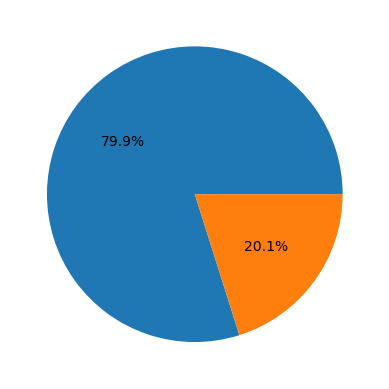

In [14]:

plt.pie(df['Class/ASD'].value_counts().values , autopct='%1.1f%%')
plt.show()

In [15]:
# sepearting on the basis of datatype

ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)






In [16]:
print(ints)

['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']


In [17]:

ints.remove('ID')
ints.remove('Class/ASD')

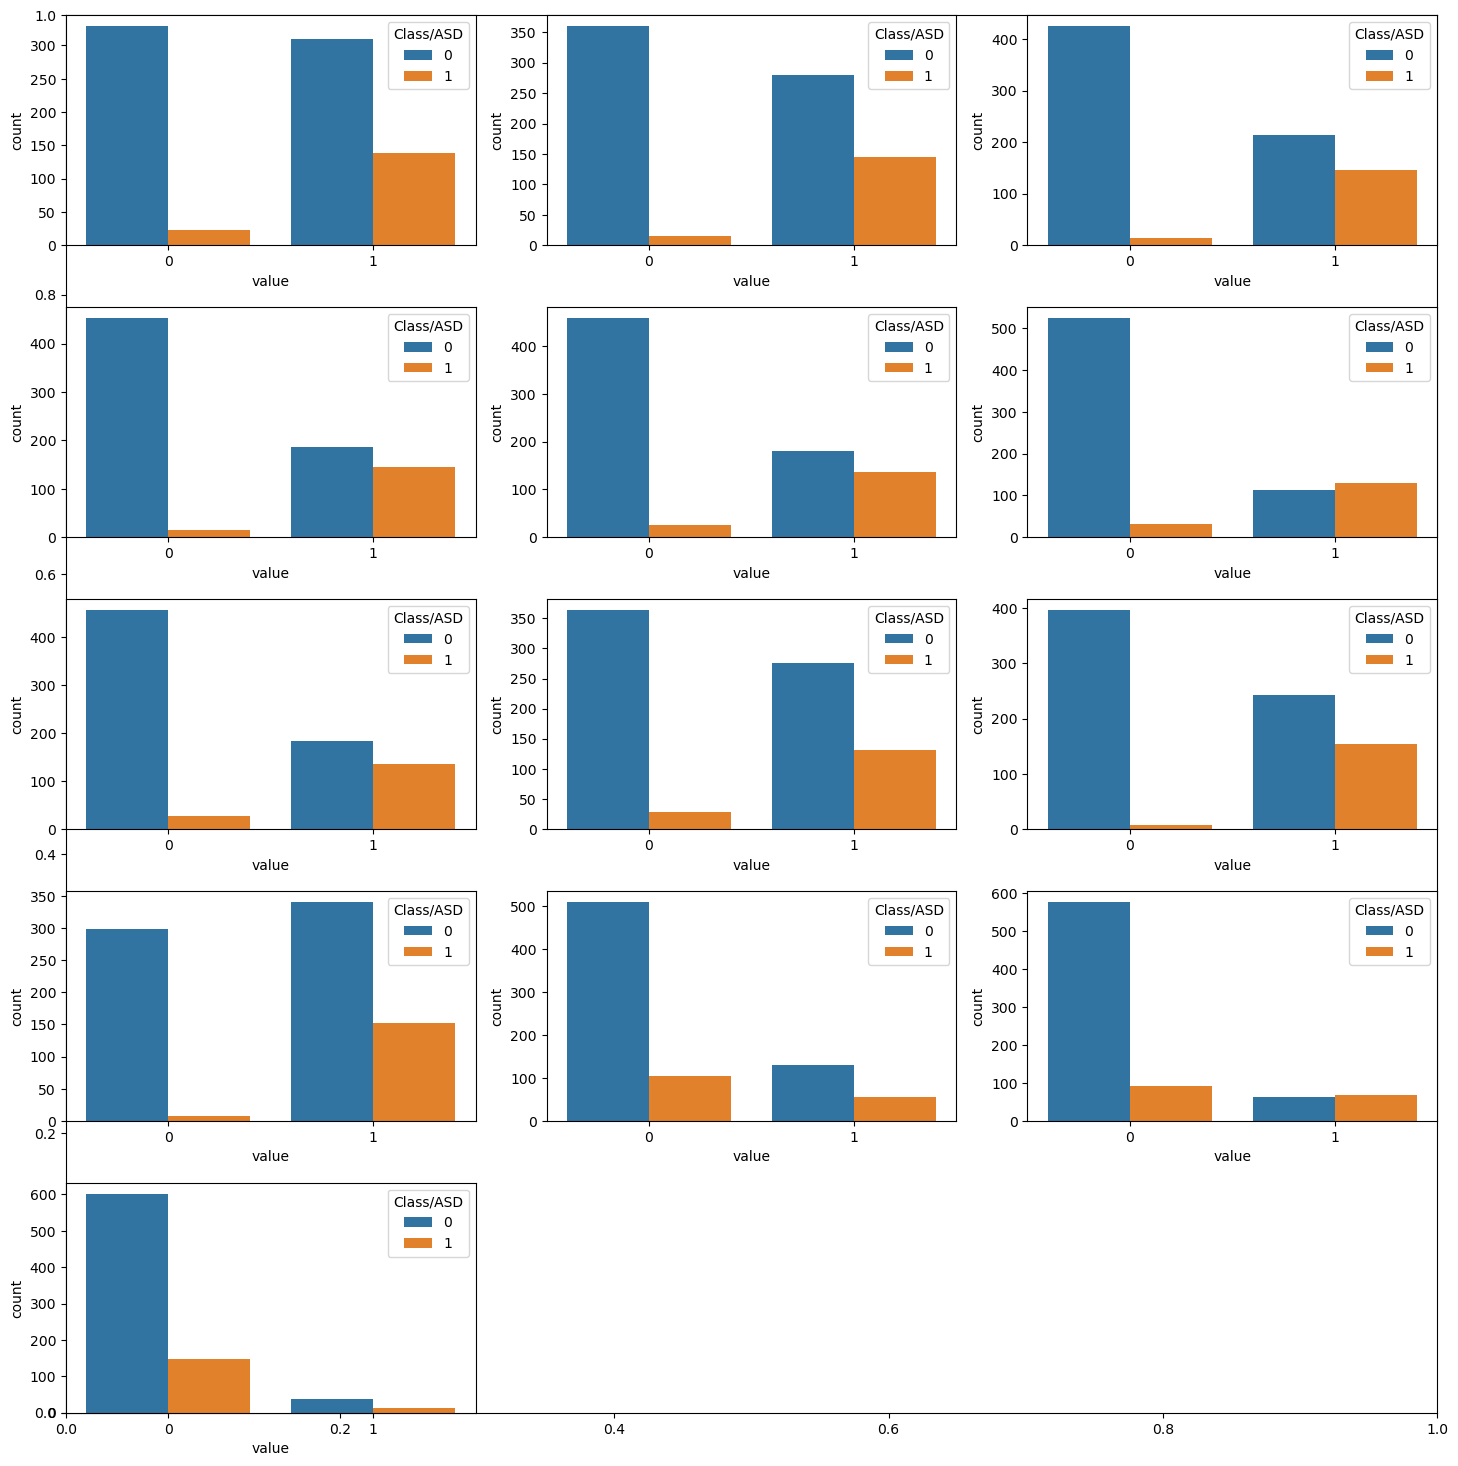

In [18]:


df_melted = df.melt(id_vars = ['ID','Class/ASD'], value_vars=ints , var_name='col',value_name = 'value')

plt.subplots(figsize=(15,15))

for i , col in enumerate(ints):
  plt.subplot(5,3,i + 1)

  sb.countplot(x='value', hue='Class/ASD' , data= df_melted[df_melted['col'] == col])

plt.tight_layout()
plt.show()









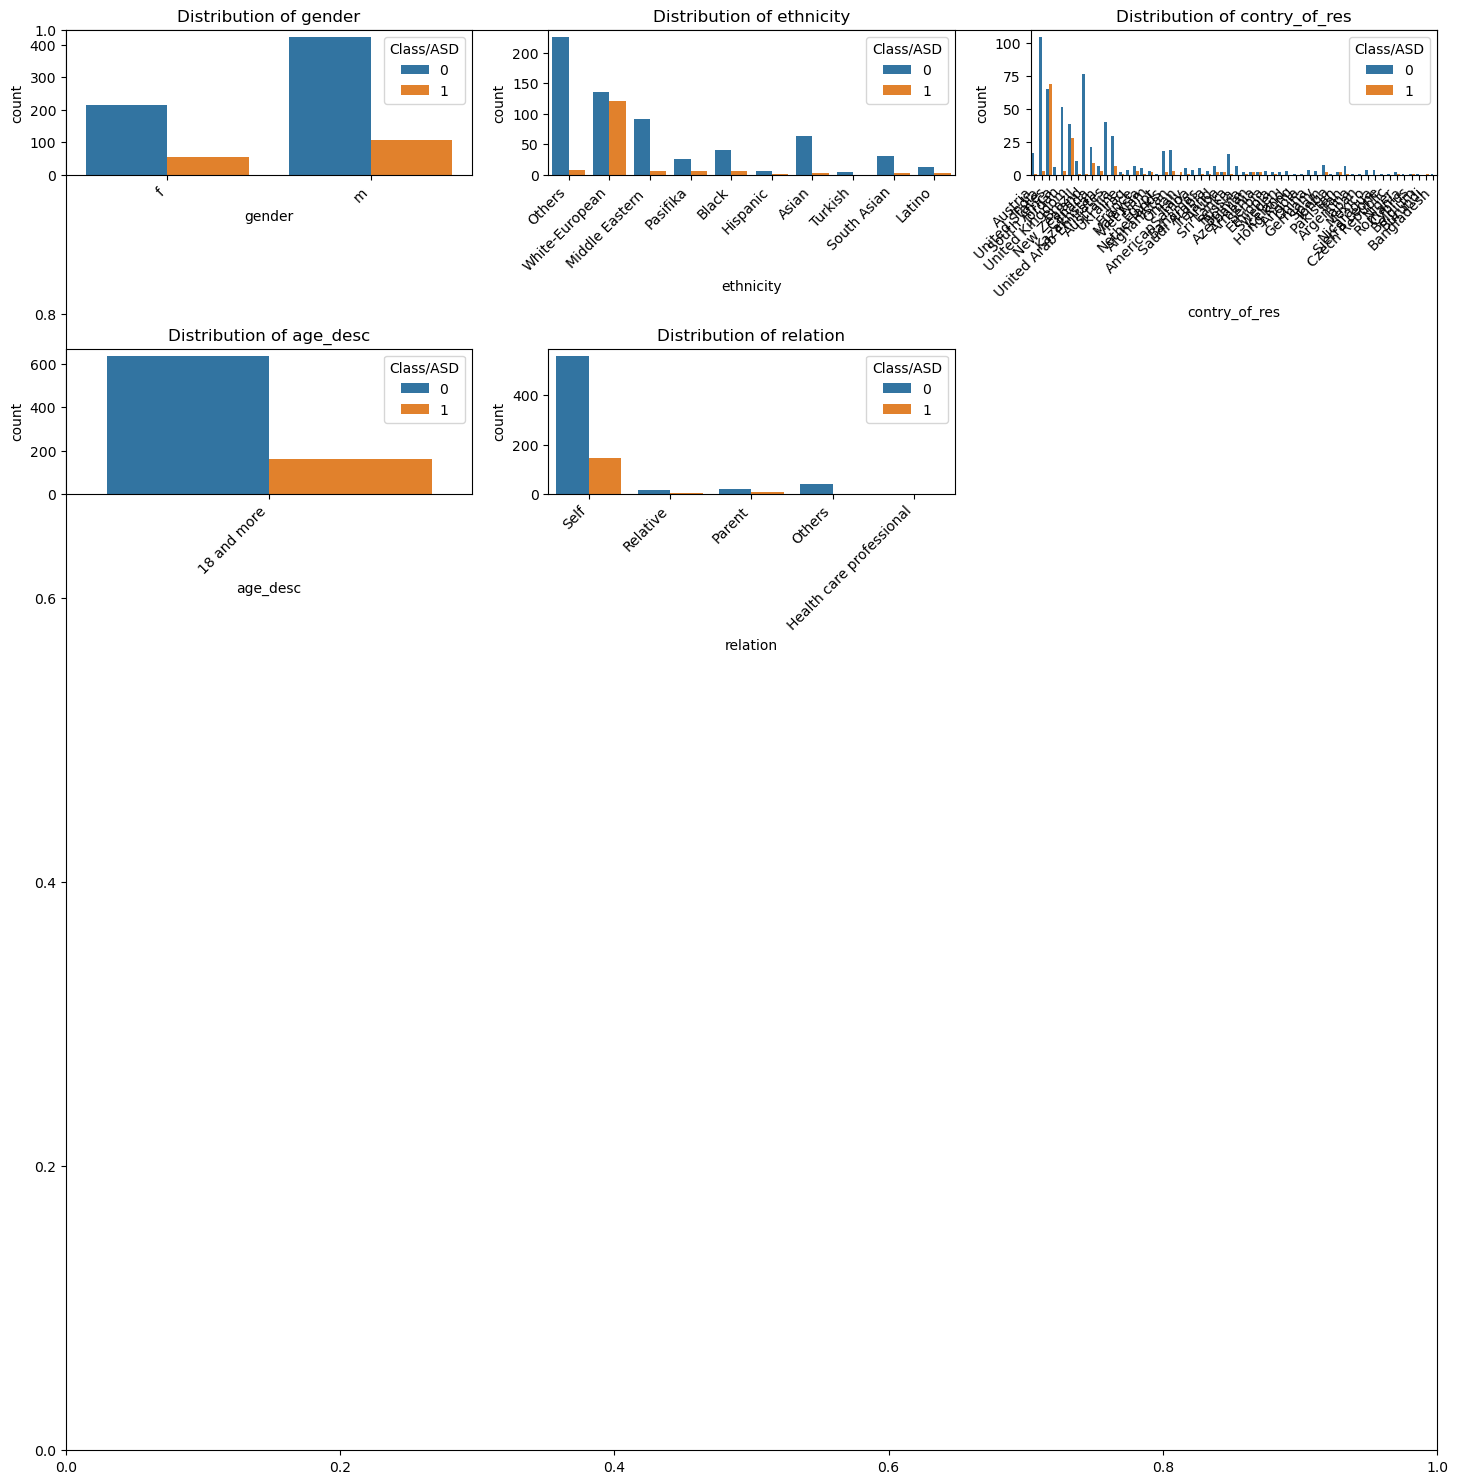

In [19]:
plt.subplots(figsize=(15, 15))  # Adjust figure size as needed

for i, col in enumerate(objects):
    plt.subplot(5, 3, i + 1)  # Adjust subplot grid as needed
    sb.countplot(x=col, hue='Class/ASD', data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right') # Rotates x-axis labels for better readability

plt.tight_layout()
plt.show()




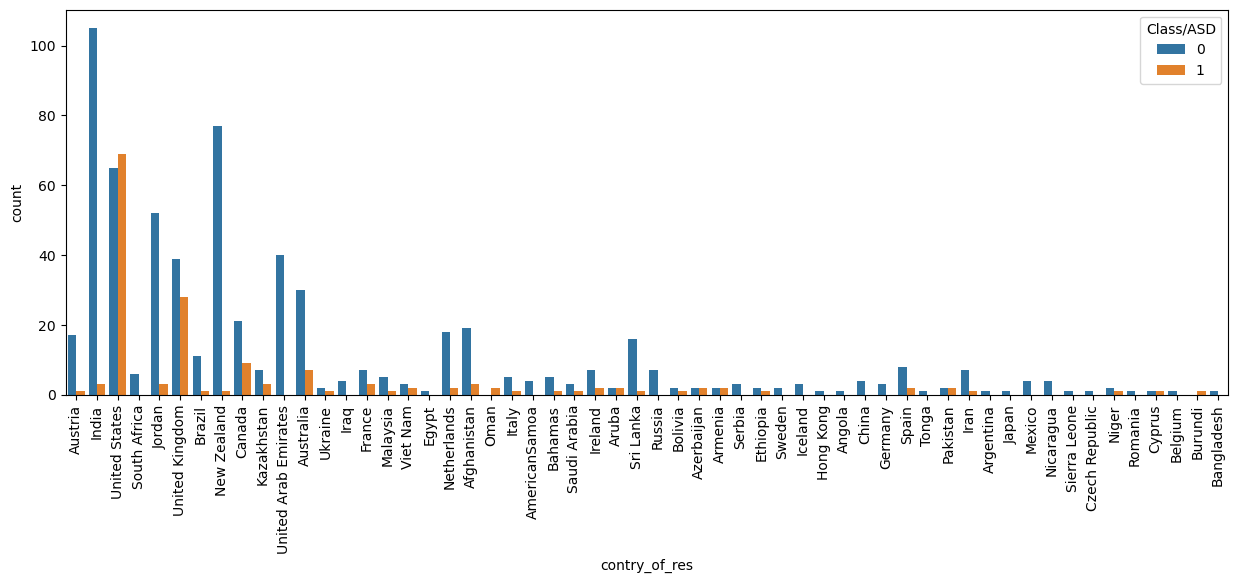

In [20]:

plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()

/var/folders/01/zhhqfq8s0msdc80fbq462wlm0000gn/T/ipykernel_25740/1189055346.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
/var/folders/01/zhhqfq8s0msdc80fbq462wlm0000gn/T/ipykernel_25740/1189055346.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])


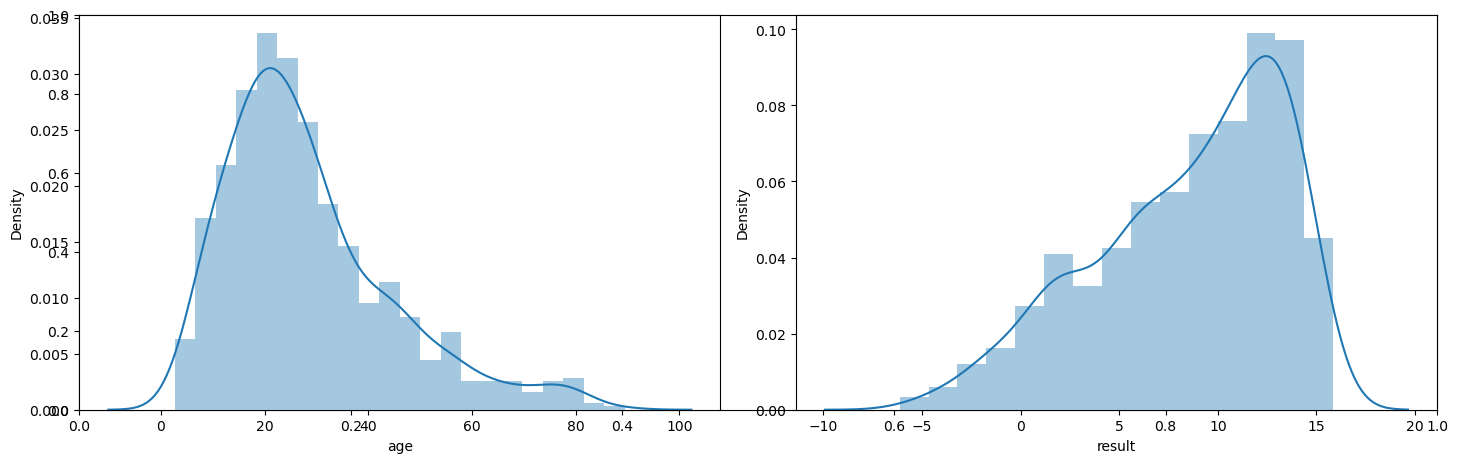

In [21]:

plt.subplots(figsize=(15,5))

for i , col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

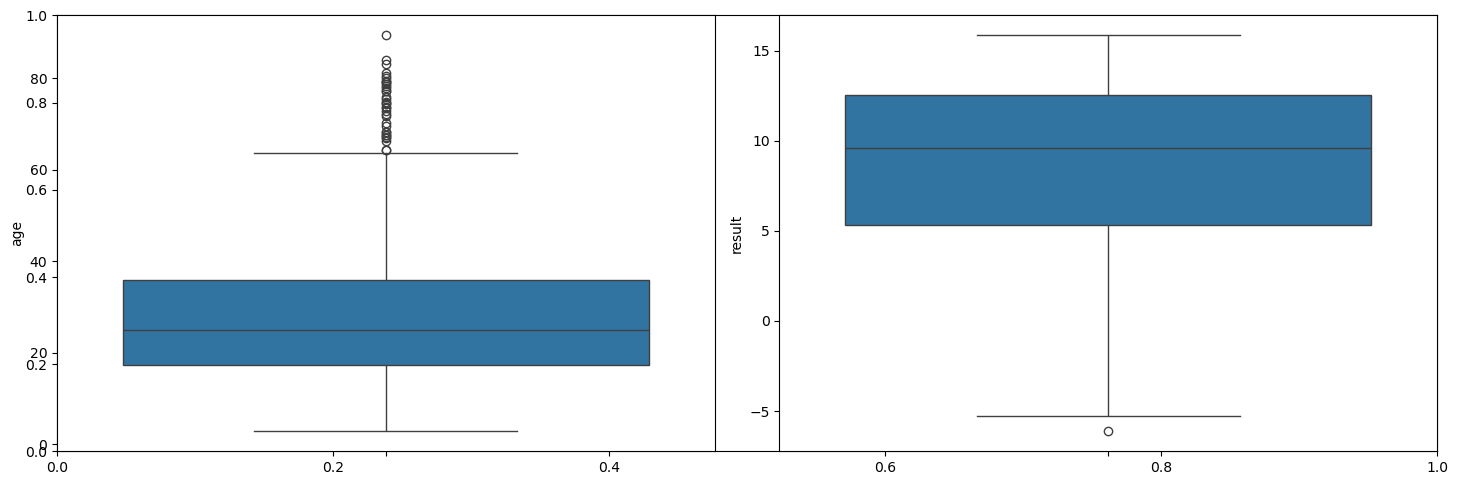

In [22]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [23]:

df = df[df['result']> -5]
df.shape

(798, 22)

## Step 6: Feature Engineering

In [24]:

def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    else:
        return 'Senior'
df['ageGroup'] = df['age'].apply(convertAge)

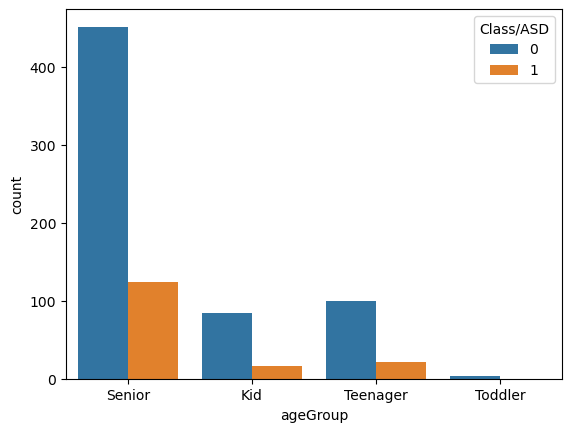

In [25]:

sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [26]:

def add_feature(data):
  #creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:, 'A1_Score':'A10_Score'].columns:
    #updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]
  
  # creating a data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data


df = add_feature(df)


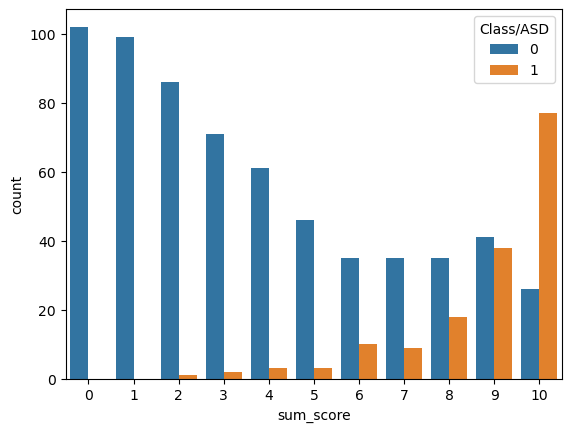

In [27]:

sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

In [28]:

# apply log to remove the skewness of the data

df['age'] = df['age'].apply(lambda x: np.log(x))

/var/folders/01/zhhqfq8s0msdc80fbq462wlm0000gn/T/ipykernel_25740/57686355.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['age'])


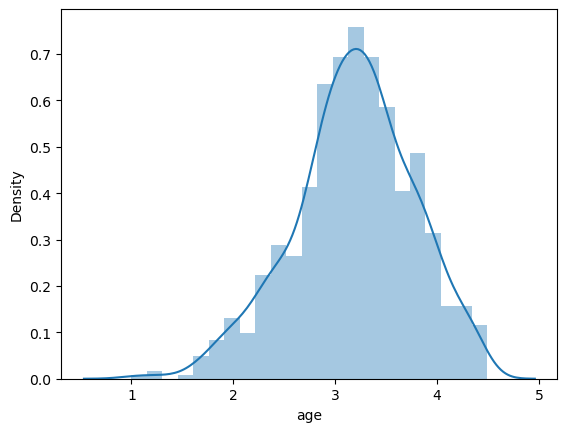

In [29]:

sb.distplot(df['age'])
plt.show()


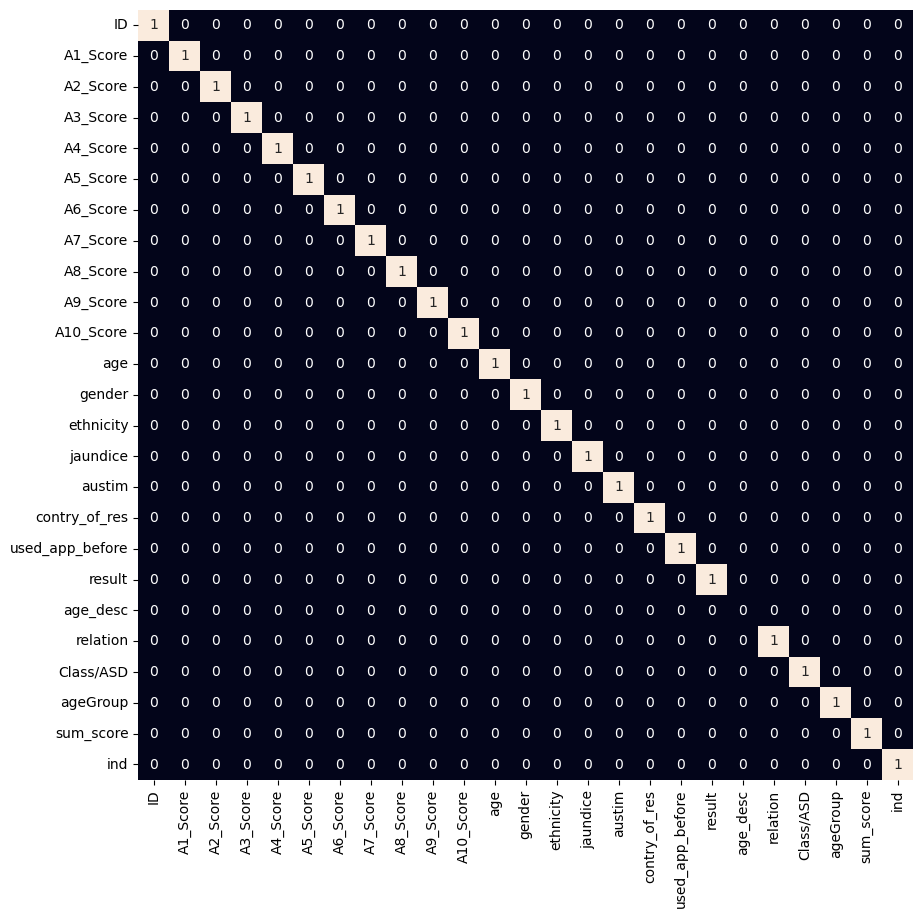

In [30]:

def encode_labels(data):
    for col in data.columns:
      
      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
    
    return data

df = encode_labels(df)

# making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot = True, cbar = False)
plt.show()
         
 
  






## Step 7: Model Training

In [31]:
'''
# we  will separate the features and target variables
removal = ['ID', 'age_desc', 'used_app_before','austim']
features = df.drop(removal + ['Class/ASD'], axis = 1)
target = df['Class/ASD']

'''
# 👇 Only keep features used in Streamlit app
removal = [
    'ID', 'age_desc', 'used_app_before', 'austim', 
    'ethnicity', 'relation', 'contry_of_res', 'ageGroup', 'gender'
]

features = df.drop(removal + ['Class/ASD'], axis = 1)
target = df['Class/ASD']

In [32]:
# spliting 

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data is  imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)



In [33]:
X.shape , Y.shape

((1026, 15), (1026,))

In [34]:

# Now, let’s normalize the data to obtain stable and fast training.

scaler = StandardScaler()

X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [35]:
from sklearn import metrics


In [36]:


models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]
model_names = ['logistic_regression', 'xgboost', 'svc_rbf']

trained_models = {}

for model, name in zip(models, model_names):
    model.fit(X, Y)

    print(f'{model} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
    print()

    trained_models[name] = model




LogisticRegression() : 
Training Accuracy :  0.8654970760233919
Validation Accuracy :  0.7741935483870966

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7450716845878137

SVC() : 
Training Accuracy :  0.9200779727095516
Validation A

In [37]:
import pickle

# Save all models into a single pickle file
with open('all_models.pkl', 'wb') as f:
    pickle.dump(trained_models, f)

print("All models saved into 'all_models.pkl'!")

All models saved into 'all_models.pkl'!


In [38]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
